# MARATÓN BEHIND THE CODE 2020

## DESAFÍO 2: PARTE 1

### Introducción

En proyectos de ciencia de datos destinados a construir modelos de *aprendizaje automático*, o aprendizaje estadístico, es muy inusual que los datos iniciales ya estén en el formato ideal para la construcción de modelos. Se requieren varios pasos intermedios de preprocesamiento de datos, como la codificación de variables categóricas, normalización de variables numéricas, tratamiento de datos faltantes, etc. La biblioteca **scikit-learn**, una de las bibliotecas de código abierto más populares para *aprendizaje automático* en el mundo, ya tiene varias funciones integradas para realizar las transformaciones de datos más utilizadas. Sin embargo, en un flujo común de un modelo de aprendizaje automático, es necesario aplicar estas transformaciones al menos dos veces: la primera vez para "entrenar" el modelo, y luego nuevamente cuando se envían nuevos datos como entrada para ser clasificados por este modelo.

Para facilitar el trabajo con este tipo de flujos, scikit-learn también cuenta con una herramienta llamada **Pipeline**, que no es más que una lista ordenada de transformaciones que se deben aplicar a los datos. Para ayudar en el desarrollo y la gestión de todo el ciclo de vida de estas aplicaciones, además del uso de Pipelines, los equipos de científicos de datos pueden utilizar en conjunto **Watson Machine Learning**, que tiene docenas de herramientas para entrenar , gestionar, alojar y evaluar modelos basados ​​en el aprendizaje automático. Además, Watson Machine Learning es capaz de encapsular pipelines y modelos en una API lista para usar e integrarse con otras aplicaciones.

Durante el desafío 2, aprenderás como crear un **Pipeline** para un modelo de clasificación y alojarlo como una API con la ayuda de Watson Machine Learning. Una vez alojado, puedes integrar el modelo creado con otras aplicaciones, como asistentes virtuales y más. En este notebook, se presentará un ejemplo funcional de creación de un modelo y un pipeline en scikit-learn (¡que puedes usar como plantilla para tu solución!).

### Trabajando con Pipelines del scikit-learn

In [1]:
# Primero, realizamos la instalación de scikit-learn versión 0.20.0 en el Kernel de este notebook:
!pip install scikit-learn==0.20.0 --upgrade

/bin/bash: pip: command not found


In [2]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np


# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

### Importar  un .csv a tu proyecto en IBM Cloud Pak for Data al Kernel de este notebook

Primero, importaremos el conjunto de datos proporcionado para el desafío, que ya está incluido en este proyecto.

Puedes importar datos desde un archivo .csv directamente al Kernel del portátil como un Pandas DataFrame, que se usa ampliamente para manipular datos en Python.

Para realizar la importación, simplemente selecciona la siguiente celda y siga las instrucciones en la imagen a continuación:

![alt text](https://i.imgur.com/K1DwL9I.png "importing-csv-as-df")

Después de seleccionar la opción **"Insertar en el código"**, la celda de abajo se llenará con el código necesario para importar y leer los datos en el archivo .csv como un Pandas DataFrame.

In [3]:
df_data_1 = pd.read_csv(r'dataset-tortuga-desafio-2.csv')

Tenemos 16 columnas presentes en el set de datos proporcionado, 15 de las cuales son variables features (datos de entrada) y una de ellas es una variable target (que queremos que nuestro modelo va a predecir).

Las variables features son:

    Unnamed: 0                          - Esta columna no tiene nombre y debe ser eliminada del dataset
    NAME                                - Nombre del estudiante
    USER_ID                             - Número de identificación del estudiante
    HOURS_DATASCIENCE                   - Número de horas de estudio en Data Science
    HOURS_BACKEND                       - Número de horas de estudio en Web (Back-End)
    HOURS_FRONTEND                      - Número de horas de estudio en Web (Front-End)
    NUM_COURSES_BEGINNER_DATASCIENCE    - Número de cursos de nivel principiante en Data Science completados por el estudiante
    NUM_COURSES_BEGINNER_BACKEND        - Número de cursos de nivel principiante en Web (Back-End) completados por el estudiante
    NUM_COURSES_BEGINNER_FRONTEND       - Número de cursos de nivel principiante en Web (Front-End) completados por el estudiante
    NUM_COURSES_ADVANCED_DATASCIENCE    - Número de cursos de nivel avanzado en Data Science completados por el estudiante
    NUM_COURSES_ADVANCED_BACKEND        - Número de cursos de nivel avanzado en Web (Back-End) completados por el estudiante
    NUM_COURSES_ADVANCED_FRONTEND       - Número de cursos de nivel avanzado en Web (Front-End) completados por el estudiante
    AVG_SCORE_DATASCIENCE               - Promedio acumulado en cursos de Data Science completados por el estudiante
    AVG_SCORE_BACKEND                   - Promedio acumulado en cursos de Web (Back-End) completados por el estudiante
    AVG_SCORE_FRONTEND                  - Promedio acumulado en cursos de Web (Front-End) completados por el estudiante
    
La variable target es:

    PROFILE                             - Perfil de carrera del estudiante (puede ser uno de 6)
    
        - beginner_front_end
        - advanced_front_end
        - beginner_back_end
        - advanced_back_end
        - beginner_data_science
        - advanced_data_science
        
Con un modelo capaz de clasificar a un alumno en una de estas categorías, podemos recomendar contenidos a los alumnos de forma personalizada según las necesidades de cada alumno.

### Constantes del entorno
Se crea una semilla aleatoria para los modelos

In [4]:
semilla_aleatoria = 1234

### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [5]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

### Cantidad de datos variables Categoricas

Se puede ver la cantidad valores que corresponde a la variable a predecir.

In [6]:
df_frecuencia_cat=df_data_1.groupby(['PROFILE'],as_index=False).size()   
print(df_frecuencia_cat)

                 PROFILE  size
0       advanced_backend  3339
1  advanced_data_science  3330
2     advanced_front_end  3337
3       beginner_backend  3332
4  beginner_data_science  3327
5     beginner_front_end  3335


### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='HOURS_FRONTEND'>

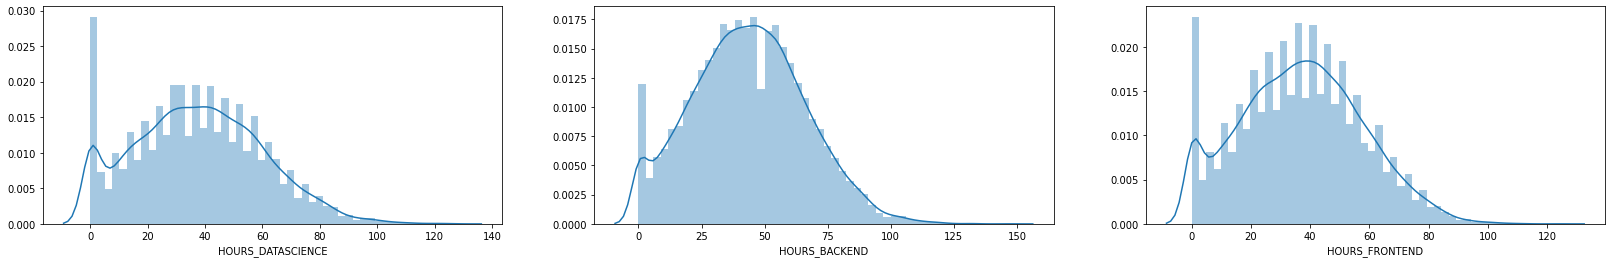

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['HOURS_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_data_1['HOURS_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_data_1['HOURS_FRONTEND'].dropna(), ax=axes[2])

<AxesSubplot:xlabel='NUM_COURSES_ADVANCED_FRONTEND'>

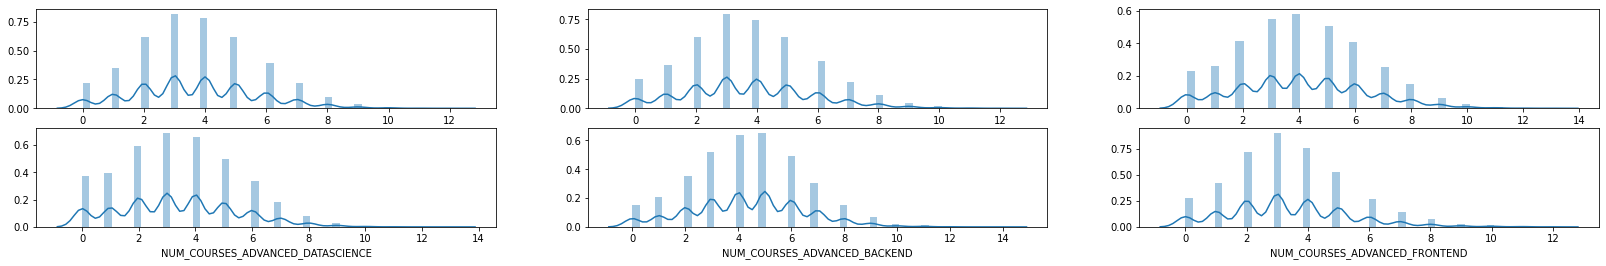

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['NUM_COURSES_BEGINNER_DATASCIENCE'].dropna(), ax=axes[0][0])
sns.distplot(df_data_1['NUM_COURSES_BEGINNER_BACKEND'].dropna(), ax=axes[0][1])
sns.distplot(df_data_1['NUM_COURSES_BEGINNER_FRONTEND'].dropna(), ax=axes[0][2])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_DATASCIENCE'].dropna(), ax=axes[1][0])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_BACKEND'].dropna(), ax=axes[1][1])
sns.distplot(df_data_1['NUM_COURSES_ADVANCED_FRONTEND'].dropna(), ax=axes[1][2])

<AxesSubplot:xlabel='AVG_SCORE_FRONTEND'>

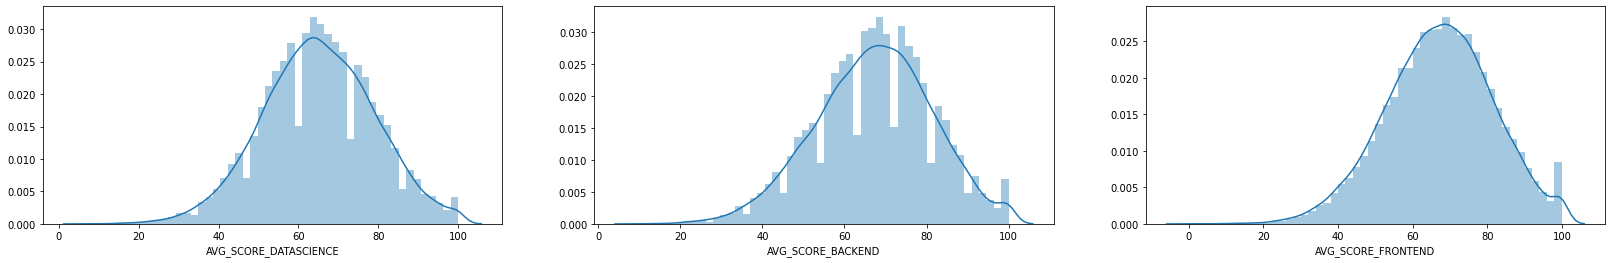

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_data_1['AVG_SCORE_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_data_1['AVG_SCORE_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_data_1['AVG_SCORE_FRONTEND'].dropna(), ax=axes[2])

<AxesSubplot:xlabel='PROFILE', ylabel='count'>

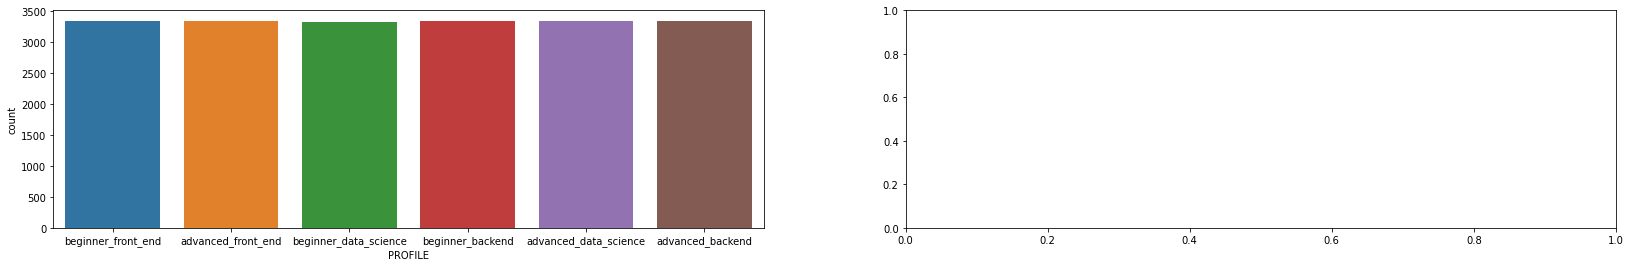

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))

sns.countplot(ax=axes[0], x='PROFILE', data=df_data_1)

### Preprocesamiento de datos

Para el preprocesamiento de los datos, se presentarán en este notebook dos transformaciones básicas, demostrando la construcción de un Pipeline con un modelo funcional. Este Pipeline funcional provisto debe ser mejorado por el participante para que el modelo final alcance la mayor precisión posible, garantizando una mayor puntuación en el desafío. Esta mejora solo se puede realizar en el preprocesamiento de los datos, en la elección de un algoritmo para el entrenamiento de diferentes modelos, o incluso en la alteración del **framework** utilizado (sin embargo, solo se entregará un ejemplo de integración de Watson Machine Learning con *scikit-learn*).

La primera transformación (paso en nuestro Pipeline) será la exclusión de la columna "NOMBRE" de nuestro conjunto de datos, que además de no ser una variable numérica, tampoco es una variable relacionada con el desempeño de los estudiantes en las disciplinas. Hay funciones listas para usar en *scikit-learn* para realizar esta transformación, sin embargo, nuestro ejemplo demostrará cómo crear una transformación personalizada desde cero en scikit-learn. Si lo desea, el participante puede usar este ejemplo para crear otras transformaciones y agregarlas al Pipeline final :)

#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos ``transform`` y ``fit``. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación ``DropColumns`` para eliminar columnas de un pandas DataFrame.

In [12]:
# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

Para aplicar esa transformación en un pandas DataFrame pandas, basta instanciar un objeto *DropColumns* y llamar el método transform().

In [13]:
# Creación de instancias de una transformación DropColumns
rm_columns = DropColumns(
    columns=["NAME", "Unnamed: 0","USER_ID"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

print(rm_columns)

DropColumns(columns=['NAME', 'Unnamed: 0', 'USER_ID'])


In [14]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_data_1)
# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_data_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data_1
    ),
)

In [15]:
# Ver las columnas del conjunto de datos transformado
print("Columnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df_data_2.columns)

Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND',
       'PROFILE'],
      dtype='object')


Tenga en cuenta que la columna "NOMBRE" se ha eliminado y nuestro conjunto de datos ahora solo tiene 14 columnas.

#### Transformación 2: tratamiento de datos faltantes

Para manejar los datos que faltan en nuestro conjunto de datos, ahora usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada **SimpleImputer**.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Estrategia reemplazo por la mediana.

#### Extraer columas modelo

In [16]:
num_features = df_data_2.columns.drop(['PROFILE'])
print(num_features)

Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],
      dtype='object')


In [17]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features)])

In [18]:
features = [
    "NAME","Unnamed: 0","USER_ID", "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]

# Definición de variable objetivo
target = ['PROFILE']
X = df_data_1[features]
y = df_data_1[target]

### Entrenando varios modelos de clasificación

In [19]:
class_SVC = SVC(random_state=semilla_aleatoria,gamma='auto')
class_RFO = RandomForestClassifier(random_state=semilla_aleatoria)
class_RNN = MLPClassifier(random_state=semilla_aleatoria)
voting_clf = VotingClassifier(estimators=[('SVC', class_SVC), ('RFOR', class_RFO),('RNN',class_RNN)], voting='hard')
clf = Pipeline(steps=[('removecols',rm_columns),
                      ('preprocessor', preprocessor),
                      ('clf', voting_clf)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('removecols',
                 DropColumns(columns=['NAME', 'Unnamed: 0', 'USER_ID'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACK...
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],
      dtype='object'))])),
                ('clf',

### Predicciones del modelo

In [20]:
# Realización de una prueba a ciegas en el modelo creado
y_pred = clf.predict(X_test)

### Metricas del Modelo

In [21]:
# Precisión lograda por el árbol de decisiones
print("model score: %.3f" % clf.score(X_test, y_test))
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

model score: 0.959
Exactitud: 96.0%


### Matriz de confusion

In [22]:
display(confusion_matrix(y_test,y_pred))
class_report=classification_report(y_test,y_pred)
print(class_report)      

array([[660,  13,   3,   4,   4,   3],
       [  3, 665,   9,   5,   9,   3],
       [  4,   3, 630,   5,   0,   9],
       [  7,   5,  10, 619,   5,   6],
       [  5,   5,   5,   7, 618,   4],
       [  6,   4,   7,   6,   5, 644]])

                       precision    recall  f1-score   support

     advanced_backend       0.96      0.96      0.96       687
advanced_data_science       0.96      0.96      0.96       694
   advanced_front_end       0.95      0.97      0.96       651
     beginner_backend       0.96      0.95      0.95       652
beginner_data_science       0.96      0.96      0.96       644
   beginner_front_end       0.96      0.96      0.96       672

             accuracy                           0.96      4000
            macro avg       0.96      0.96      0.96      4000
         weighted avg       0.96      0.96      0.96      4000



### Validación cruzada del Modelo Kfolds

In [23]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.9515625, 0.95     , 0.95     , 0.96125  , 0.9515625])

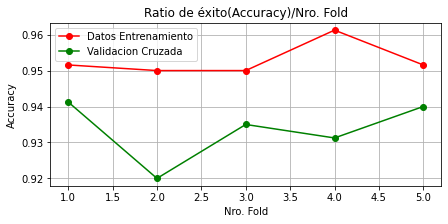

In [24]:
graficar_accuracy_scores(clf,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [25]:
error

NameError: name 'error' is not defined

## Tunning de los Hiperparametros de los Modelos
### Correr únicamente si se desea hacer una mejora en los hiper parametros

In [ ]:
##### from sklearn.model_selection import RandomizedSearchCV
parameter_space = {'clf__SVC__C':[0.1, 1, 10, 100, 1000],
    'clf__SVC__kernel' : ['linear', 'rbf', 'poly'],
    'clf__RFOR__n_estimators':  [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'clf__RFOR__max_features': ['auto', 'sqrt'],
    'clf__RFOR__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'clf__RFOR__min_samples_split': [2, 5, 10],
    'clf__RFOR__min_samples_leaf':  [1, 2, 4],
    'clf__RFOR__bootstrap': [True, False],        
    'clf__RNN__hidden_layer_sizes': [(12,12,6),(144,144,12),(12,144,6),(24,432,12),(24,144,24)],
    'clf__RNN__activation': ['tanh', 'relu'],
    'clf__RNN__solver': ['sgd', 'adam'],
    'clf__RNN__alpha': [0.0001, 0.05,0.02],
    'clf__RNN__max_iter': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 6)],              
    'clf__RNN__learning_rate': ['constant','adaptive'],   
}
clf_rnd = Pipeline(steps=[('removecols',rm_columns),
                      ('preprocessor', preprocessor),
                      ('clf', voting_clf)])
clf_CV = RandomizedSearchCV(clf_rnd, parameter_space, n_jobs=-1, cv=5)
clf_CV.fit(X_train, y_train) 

### Impresion parametros optimizados valores hiperparametros

In [ ]:
print('Los parametros optimizados son:\n', clf_CV.best_params_)

### Entrenando varios modelos de clasificación con tunnig

In [ ]:
class_SVC = SVC(C=1000,kernel='rbf',random_state=semilla_aleatoria,gamma='auto')
class_RFO = RandomForestClassifier(n_estimators=800, min_samples_split=2,min_samples_leaf= 1,max_features= 'auto',max_depth=30, bootstrap=True, random_state=semilla_aleatoria)
class_RNN = MLPClassifier(solver= 'sgd', max_iter= 480, learning_rate= 'adaptive', hidden_layer_sizes= (144, 144, 12), alpha= 0.05, activation='tanh', random_state=semilla_aleatoria)
class_LRE = LogisticRegression(C=1e5)

voting_clf = VotingClassifier(estimators=[('LREG',class_LRE)], voting='hard')
clf = Pipeline(steps=[('removecols',rm_columns),
                      ('preprocessor', preprocessor),
                      ('clf', voting_clf)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

### Predicciones del modelo

In [ ]:
# Realización de una prueba a ciegas en el modelo creado
y_pred = clf.predict(X_test)

### Metricas del Modelo

In [ ]:
# Precisión lograda por el árbol de decisiones
print("model score: %.3f" % clf.score(X_test, y_test))
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

### Matriz de confusion

In [ ]:
display(confusion_matrix(y_test,y_pred))
class_report=classification_report(y_test,y_pred)
print(class_report)   

### Validación cruzada del Modelo Kfolds

In [ ]:
graficar_accuracy_scores(clf,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

<hr>

Este notebook demostró cómo trabajar con transformaciones y modelos con la biblioteca scikit-learn. Se recomienda que el participante realice sus experimentos editando el código proporcionado aquí hasta lograr un modelo con alta precisión.

Cuando esté satisfecho con su modelo, puede pasar al segundo paso del desafío: encapsular su modelo como una API REST lista para usar con Watson Machine Learning.

El notebook para la segunda etapa ya está en este proyecto, simplemente acceda a la pestaña **ASSETS** e inícielo. No olvide apagar primero el Kernel en este portátil para reducir el consumo de su nivel gratuito de IBM Cloud Pak for Data.